### Global wet bulb temperature vs web bult temperature
Global wet bult temperature is calculated by Andy reference to: https://github.com/QINQINKONG/PyWBGT/tree/v1.0.0

#### 1 Climatology
 - 1.1 Mean
 - 1.2 Annual maximum  mean
#### 2 Trend: TWB/GWBT increase over 1980-2020 (linear regression)  
 - 2.1) Annual mean increase over 40 years
 - 2.2) Annual maximum increase  over 40 year
#### 3 Trend: number of days exceed P95 over 1980-2020 using linear regression
 - 3.1) Calculate P95 threshold (to speed up, P95 is from 2011-2020 )
 - 3.2) Calculate annual number of days exceed P95
 - 3.3) Calculate trend using xarray da.polyfit
 - 3.4) Calculate P-value (<0.05 significant)
 - 3.5) Plotting the increase of number of days exceed P95 over 1980-2020 using linear regression ( p -value less than 0.05 hatched)

In [1]:
import os.path
import numpy as np
import xarray as xr
import datetime
from scipy import stats

import matplotlib.pyplot as plt 
import pandas as pd
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.feature as cf

In [2]:
def plot_ds(ds, var_s):
    fig = plt.figure(figsize=(13, 13))
    ax = fig.add_subplot(1, 1, 1, projection= ccrs.PlateCarree())

    cbar_kwargs = {'orientation':'horizontal', 'shrink':0.6, "pad" : .05, 'aspect':40, 'label':'2 Metre Temperature Anomaly [K]'}
    mm = plt.contourf(ds.lon, ds.lat, ds[var_s][0], transform=ccrs.PlateCarree())
    ax.coastlines()
 
    ax.coastlines(lw=1.5, resolution='110m')
    ax.add_feature(cfeature.STATES.with_scale('110m'), zorder=3, linewidth=1.5, edgecolor='g')
    plt.colorbar(mm, orientation='horizontal', pad=0.03)    
    
    plt.title(var_s, fontweight="bold",fontsize=14)
    plt.show()

In [3]:
def plot_cartopy_2d(lat_2d, lon_2d, data_2d, title_s, vmin, vmax, nlevel, cmap):
    fig = plt.figure(figsize=(13, 13))
    ax = fig.add_subplot(1, 1, 1, projection= ccrs.PlateCarree())

    levels = np.linspace(vmin, vmax, nlevel) 
    cbar_kwargs = {'orientation':'horizontal', 'shrink':0.6, "pad" : .05, 'aspect':40, 'label':'2 Metre Temperature Anomaly [K]'}
    mm = plt.contourf(lon_2d, lat_2d, data_2d, 
                      cmap = cmap, extend='both',
                      vmin = vmin, vmax = vmax, levels = levels,
                      transform=ccrs.PlateCarree())
    ax.coastlines()
 
    ax.coastlines(lw=1.5, resolution='110m')
    ax.add_feature(cfeature.STATES.with_scale('110m'), zorder=3, linewidth=1.5, edgecolor='g')
    ax.add_feature(cfeature.OCEAN, facecolor='white', zorder=1)
    
    plt.colorbar(mm, orientation='horizontal', pad=0.03, extend='both')    
    
    gl = ax.gridlines(draw_labels=True)   
    gl.xlines = gl.ylines = False

    plt.title(title_s, fontweight="bold",fontsize=14)
    plt.show()
    
def plot_cartopy_2d_overlay(lat_2d, lon_2d, data_2d, title_s, vmin, vmax, nlevel, cmap):
    '''
    overlay terrain on top of plot_cartopy_2d
    '''
    fig = plt.figure(figsize=(13, 13))
    ax = fig.add_subplot(1, 1, 1, projection= ccrs.PlateCarree())

    levels = np.linspace(vmin, vmax, nlevel) 
    cbar_kwargs = {'orientation':'horizontal', 'shrink':0.6, "pad" : .05, 'aspect':40, 'label':'2 Metre Temperature Anomaly [K]'}
    mm = plt.contourf(lon_2d, lat_2d, data_2d, 
                      cmap = cmap, extend='both',
                      vmin = vmin, vmax = vmax, levels = levels,
                      transform=ccrs.PlateCarree())
    # terrain overlay
    flnm = '/glade/campaign/mmm/c3we/prein/CONUS404/data/restart_file/wrfrst_d01_1990-01-01_00:00:00'
    with xr.open_dataset(flnm) as ds:
        hgt = ds.HGT[0]
    ax.contour (lon_2d, lat_2d, hgt, vmin = 500, vmax=3500, levels = np.linspace(0, 4000, 5),
               linewidths=0.5, colors='black', linestyles='dashed')     
    
    ax.coastlines()
 
    ax.coastlines(lw=1.5, resolution='110m')
    ax.add_feature(cfeature.STATES.with_scale('110m'), zorder=3, linewidth=1.5, edgecolor='g')
    # mask ocean 
    ax.add_feature(cfeature.OCEAN, facecolor='white', zorder=1)
    plt.colorbar(mm, orientation='horizontal', pad=0.03, extend='both')    
    
    gl = ax.gridlines(draw_labels=True)   
    gl.xlines = gl.ylines = False

    plt.title(title_s, fontweight="bold", fontsize=14)
    plt.show()

def plot_cartopy_hatches(lat_2d, lon_2d, data_2d, data_hat, title_s, vmin, vmax, nlevel, cmap):
    '''
    overlay terrain on top of plot_cartopy_2d
    '''
    fig = plt.figure(figsize=(13, 13))
    ax = fig.add_subplot(1, 1, 1, projection= ccrs.PlateCarree())

    levels = np.linspace(vmin, vmax, nlevel) 
    cbar_kwargs = {'orientation':'horizontal', 'shrink':0.6, "pad" : .05, 'aspect':40, 'label':'2 Metre Temperature Anomaly [K]'}
    mm = plt.contourf(lon_2d, lat_2d, data_2d, 
                      cmap = cmap, extend='both',
                      vmin = vmin, vmax = vmax, levels = levels,
                      transform=ccrs.PlateCarree())
    # terrain overlay
    flnm = '/glade/campaign/mmm/c3we/prein/CONUS404/data/restart_file/wrfrst_d01_1990-01-01_00:00:00'
    with xr.open_dataset(flnm) as ds:
        hgt = ds.HGT[0]
    ax.contour (lon_2d, lat_2d, hgt, vmin = 500, vmax=3500, levels = np.linspace(0, 4000, 5),
               linewidths=0.5, colors='black', linestyles='dashed')     
 
    # hatching
    plt.contourf(lon_2d, lat_2d, data_hat, levels=[ 0, 0.05, 1],
                    colors='none', hatches=['.', None])
    ax.coastlines()
 
    ax.coastlines(lw=1.5, resolution='110m')
    ax.add_feature(cfeature.STATES.with_scale('110m'), zorder=3, linewidth=1.5, edgecolor='g')
    # mask ocean 
    ax.add_feature(cfeature.OCEAN, facecolor='white', zorder=1)
    plt.colorbar(mm, orientation='horizontal', pad=0.03, extend='both')    
    
    gl = ax.gridlines(draw_labels=True)   
    gl.xlines = gl.ylines = False

    plt.title(title_s, fontweight="bold", fontsize=14)
    plt.show()

In [4]:
dir_o = '/glade/campaign/mmm/c3we/mingge/DOD/'
var_s = ['GWBT', 'TWB']
n_var = len(var_s)

# Appending and add String to list of string
dir_i = [dir_o + x + '_DAILY/'  for x in var_s ]
print(dir_i)

year_s = 1980
year_e = 2020

['/glade/campaign/mmm/c3we/mingge/DOD/GWBT_DAILY/', '/glade/campaign/mmm/c3we/mingge/DOD/TWB_DAILY/']


- 1.0) Compute annual data from daily data

In [5]:
is_mean = False  # True for Maximum

year_s = 1980
year_e = 2020
 
mon_e = 12

n_year = year_e - year_s + 1

is_first = True
for nv in range(n_var):
    if is_mean:
        flnm_o = dir_o + var_s[nv] + '_CONUS404_annual_mean.nc'
    else:
        flnm_o = dir_o + var_s[nv] + '_CONUS404_annual_max.nc'
    
    if os.path.exists(flnm_o):
        print(flnm_o, 'exist')
    else:
        for year in range(year_s, year_e + 1):
            for month in range(1, mon_e + 1):
                if is_mean:
                    flnm = dir_o + var_s[nv] + '_DAILY/' + var_s[nv] + '_' + str(year)+ str(month).zfill(2) + '_CONUS404_daily.nc'
                else:
                    flnm = dir_o + var_s[nv] + '_DAILY/' + var_s[nv] + '_' + str(year)+ str(month).zfill(2) + '_CONUS404_max.nc'
                with xr.open_dataset(flnm) as ds:
                    print(var_s[nv],flnm)
                    data_d = ds[var_s[nv]]
            
                # concatenate/append numpy data  
                if month == 1:
                    data_y = data_d.copy()
                    if is_first == True:
                        data_3d = np.zeros((n_year, data_y.shape[1], data_y.shape[2]))
                        is_first = False                     
                else:
                    data_y = np.append(data_y, data_d, axis=0)
                
                if month == mon_e:
                    if is_mean:
                        data_3d[year-year_s] = np.mean(data_y, axis=0)
                    else:
                        data_3d[year-year_s] = np.amax(data_y, axis=0)
                        
        if var_s[nv] == 'GWBT':
            da = xr.DataArray(data = data_3d,
                          coords={'time': range(year_s, year_e + 1),'lat': ds.lat, 'lon': ds.lon}, 
                          dims=["time", "y", "x"])
            
        elif  var_s[nv] == 'TWB':
            da = xr.DataArray(data = data_3d,
                          coords={'time': range(year_s, year_e + 1),'lat': ds.lat, 'lon': ds.lon}, 
                          dims=["time", "yc", "xc"])
        
        # create and write out dataset 
        ds = da.to_dataset(name = var_s[nv])         
        ds.to_netcdf(flnm_o)
        print(flnm_o)             

/glade/campaign/mmm/c3we/mingge/DOD/GWBT_CONUS404_annual_max.nc exist
/glade/campaign/mmm/c3we/mingge/DOD/TWB_CONUS404_annual_max.nc exist


- 1.1 Mean

/glade/campaign/mmm/c3we/mingge/DOD/GWBT_CONUS404_annual_mean.nc
GWBT /glade/campaign/mmm/c3we/mingge/DOD/GWBT_CONUS404_annual_mean.nc


/glade/work/mingge/miniconda3/envs/casper_2020/lib/python3.9/site-packages/xarray/backends/plugins.py:71: RuntimeWarning: Engine 'cfgrib' loading failed:
module 'cfgrib.messages' has no attribute 'DEFAULT_INDEXPATH'
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


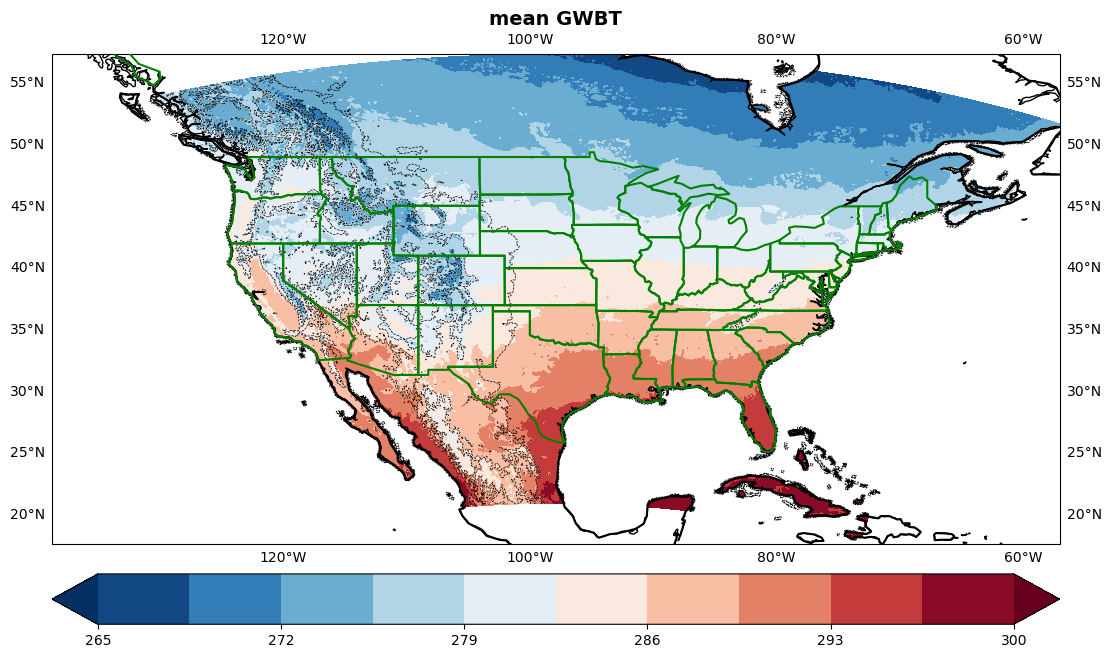

/glade/campaign/mmm/c3we/mingge/DOD/TWB_CONUS404_annual_mean.nc
TWB /glade/campaign/mmm/c3we/mingge/DOD/TWB_CONUS404_annual_mean.nc


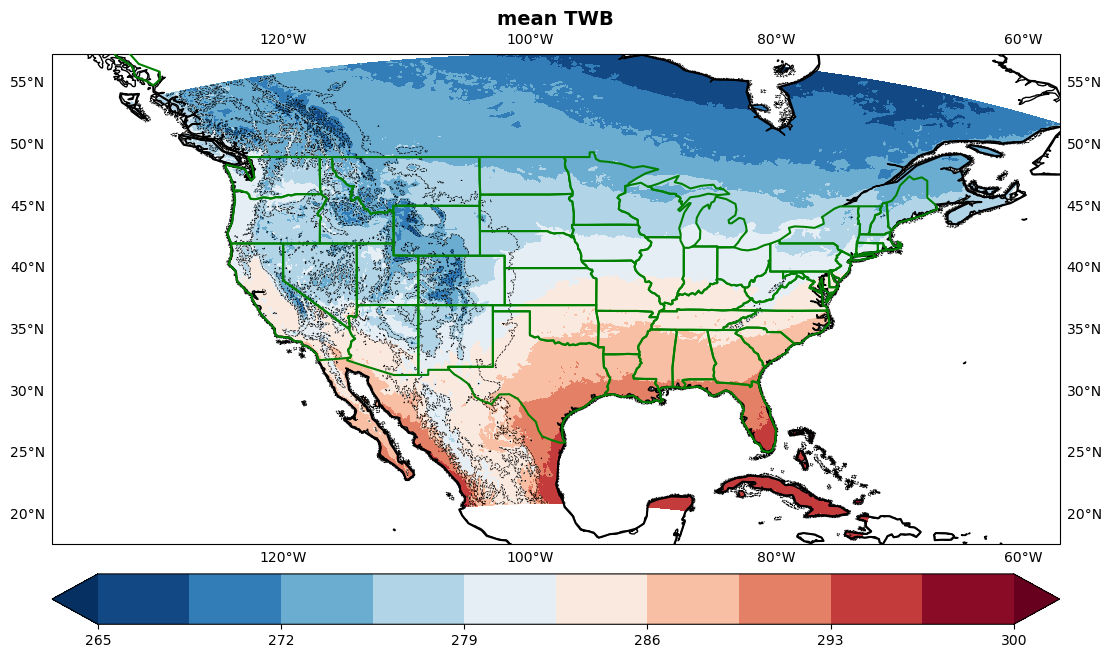

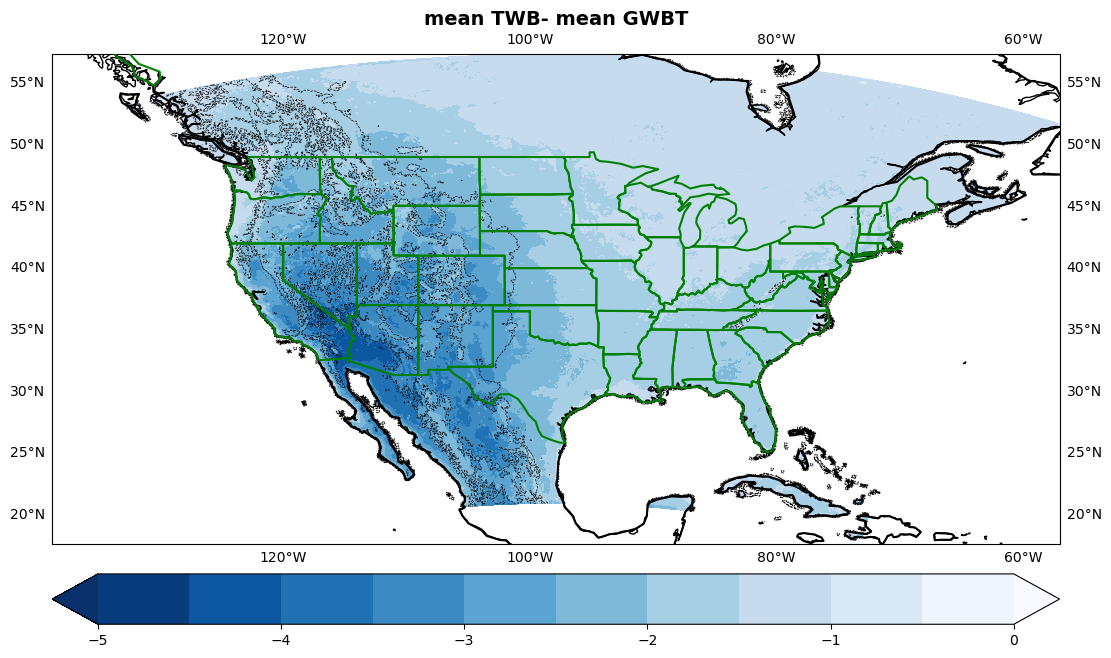

In [6]:
is_mean = True
for nv in range(n_var):
    if is_mean:
        flnm = dir_o + var_s[nv] + '_CONUS404_annual_mean.nc'
    else:
        flnm = dir_o + var_s[nv] + '_CONUS404_annual_max.nc'
    print(flnm)

    with xr.open_dataset(flnm) as ds:
        print(var_s[nv],flnm)
        da = ds[var_s[nv]].mean(dim='time')
        lat_2d = ds.lat
        lon_2d = ds.lon
    
    plot_cartopy_2d_overlay (lat_2d, lon_2d, da, 'mean '+ var_s[nv], 265, 300, 11, 'RdBu_r')
    
    if nv == 0:
        data_0 =  da
    else:
        data_2d = da.values  - data_0.values 
        plot_cartopy_2d_overlay (lat_2d, lon_2d, data_2d, 'mean ' + var_s[nv] + '- mean ' + var_s[0], -5, 0, 11, 'Blues_r'); 
    

- 1.2) mean annual maximum 

/glade/campaign/mmm/c3we/mingge/DOD/GWBT_CONUS404_annual_max.nc
GWBT /glade/campaign/mmm/c3we/mingge/DOD/GWBT_CONUS404_annual_max.nc


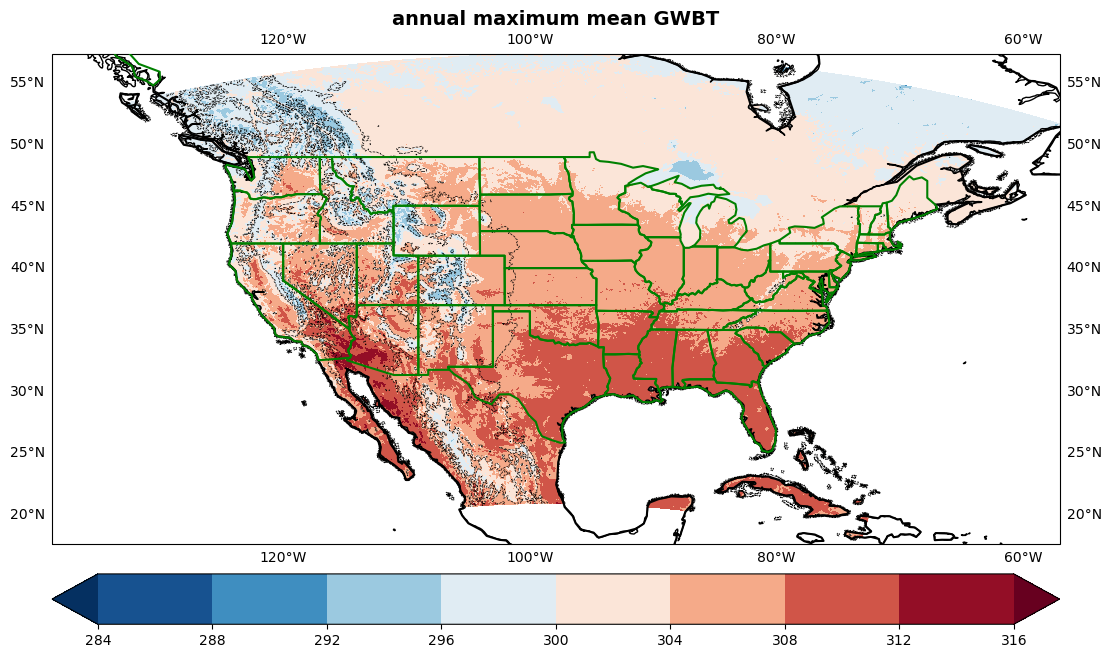

/glade/campaign/mmm/c3we/mingge/DOD/TWB_CONUS404_annual_max.nc
TWB /glade/campaign/mmm/c3we/mingge/DOD/TWB_CONUS404_annual_max.nc


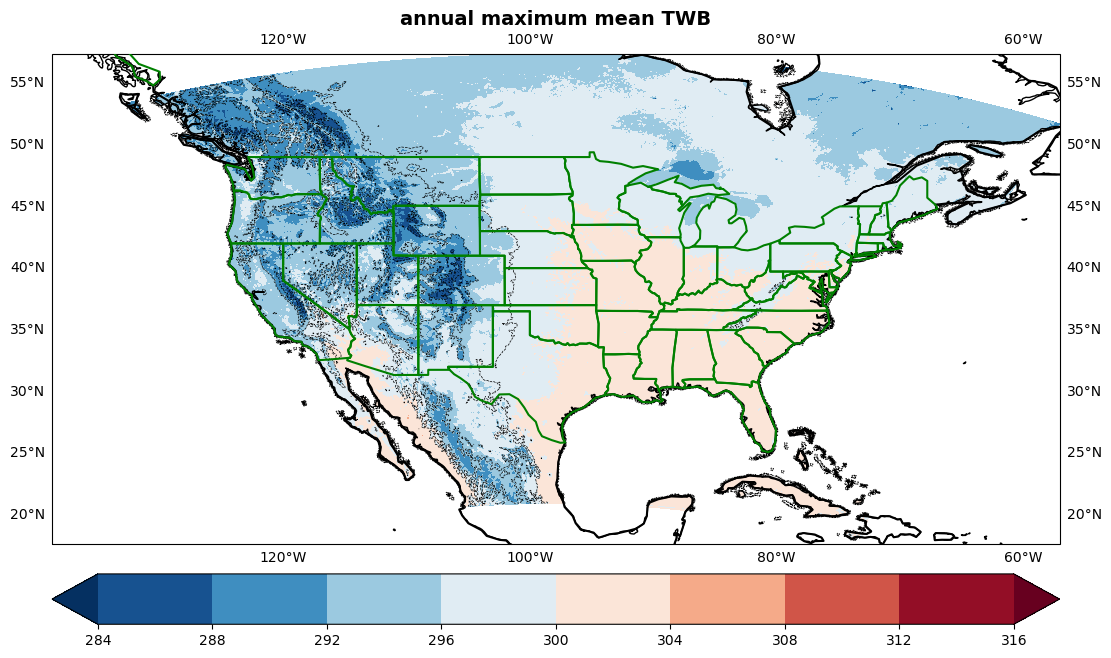

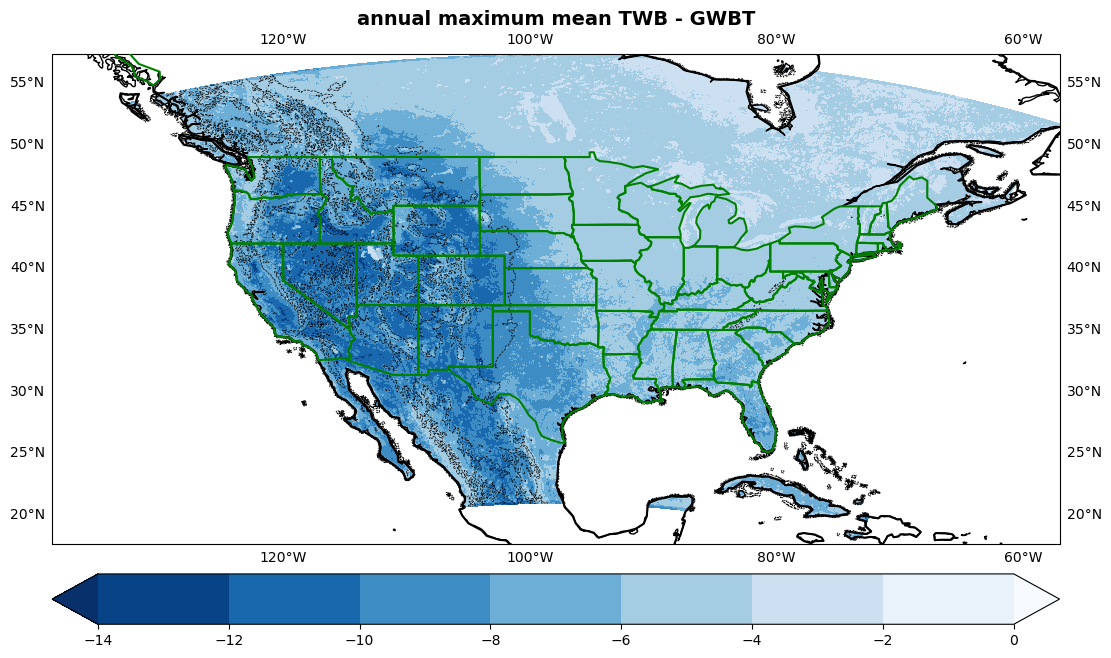

In [7]:
is_mean = False
for nv in range(n_var):
    if is_mean:
        flnm = dir_o + var_s[nv] + '_CONUS404_annual_mean.nc'
    else:
        flnm = dir_o + var_s[nv] + '_CONUS404_annual_max.nc'
    print(flnm)

    with xr.open_dataset(flnm) as ds:
        print(var_s[nv],flnm)
        da = ds[var_s[nv]].mean(dim='time')
    
    plot_cartopy_2d_overlay (ds.lat, ds.lon, da, 'annual maximum mean ' + var_s[nv], 284, 316, 9, 'RdBu_r') 

    if nv == 0:
        data_0 =  da
    else:
        data_2d = da.values  - data_0.values 
        plot_cartopy_2d_overlay (ds.lat, ds.lon, data_2d, 'annual maximum mean ' + var_s[nv] + ' - ' + var_s[0], -14, 0, 8, 'Blues_r'); 
    

##### 2 Trend calculation

In [8]:
for nv in range(n_var):
    if is_mean:
        flnm = dir_o + var_s[nv] + '_CONUS404_annual_mean.nc'
        flnm_o = dir_o + var_s[nv] + '_CONUS404_annual_mean_slope.nc'
    else:
        flnm = dir_o + var_s[nv] + '_CONUS404_annual_max.nc'
        flnm_o = dir_o + var_s[nv] + '_CONUS404_annual_max_slope.nc'
    
    if os.path.exists(flnm_o):
        print(flnm_o, 'exist')
        with xr.open_dataset(flnm_o) as ds:
            print(var_s[nv],flnm_o)
            da = ds[var_s[nv]]
    else:
        with xr.open_dataset(flnm) as ds:
            print(var_s[nv],flnm)
            data_3d = ds[var_s[nv]]
            n_year = data_3d.shape[0]
            n_lat = data_3d.shape[1]
            n_lon = data_3d.shape[2]
        
        slope_2d = np.zeros((n_lat, n_lon))  
        for ni in range(n_lat):
            print(ni)
            for nj in range(n_lon):
                slope_2d[ni, nj] = np.polyfit(range(data_3d.shape[0]), data_3d[:,ni, nj],1)[0]
            
        if var_s[nv] == 'GWBT':
            da = xr.DataArray(data = slope_2d,
                          coords={'lat': ds.lat, 'lon': ds.lon}, 
                          dims=["y", "x"])
        elif  var_s[nv] == 'TWB':
            da = xr.DataArray(data = slope_2d,
                          coords={'lat': ds.lat, 'lon': ds.lon}, 
                          dims=["yc", "xc"])
            
        ds = da.to_dataset(name=var_s[nv])         
        ds.to_netcdf(flnm_o)
        print(flnm_o)             

/glade/campaign/mmm/c3we/mingge/DOD/GWBT_CONUS404_annual_max_slope.nc exist
GWBT /glade/campaign/mmm/c3we/mingge/DOD/GWBT_CONUS404_annual_max_slope.nc
/glade/campaign/mmm/c3we/mingge/DOD/TWB_CONUS404_annual_max_slope.nc exist
TWB /glade/campaign/mmm/c3we/mingge/DOD/TWB_CONUS404_annual_max_slope.nc


- 2.1 Mean increase over 40 years

/glade/campaign/mmm/c3we/mingge/DOD/GWBT_CONUS404_annual_mean_slope.nc
GWBT /glade/campaign/mmm/c3we/mingge/DOD/GWBT_CONUS404_annual_mean_slope.nc


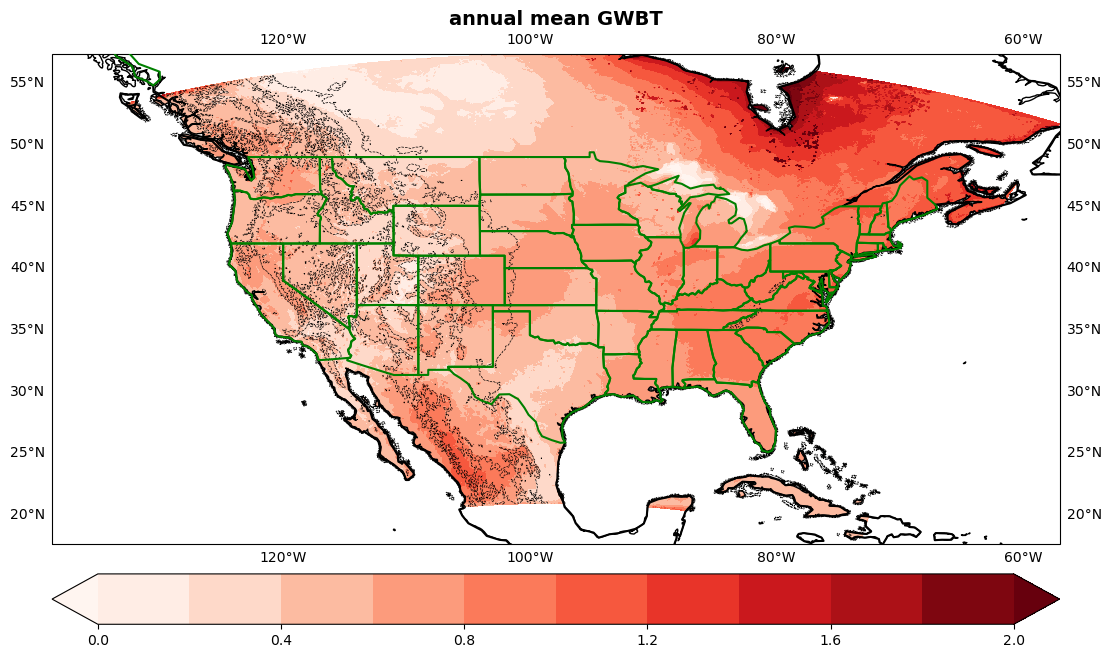

/glade/campaign/mmm/c3we/mingge/DOD/TWB_CONUS404_annual_mean_slope.nc
TWB /glade/campaign/mmm/c3we/mingge/DOD/TWB_CONUS404_annual_mean_slope.nc


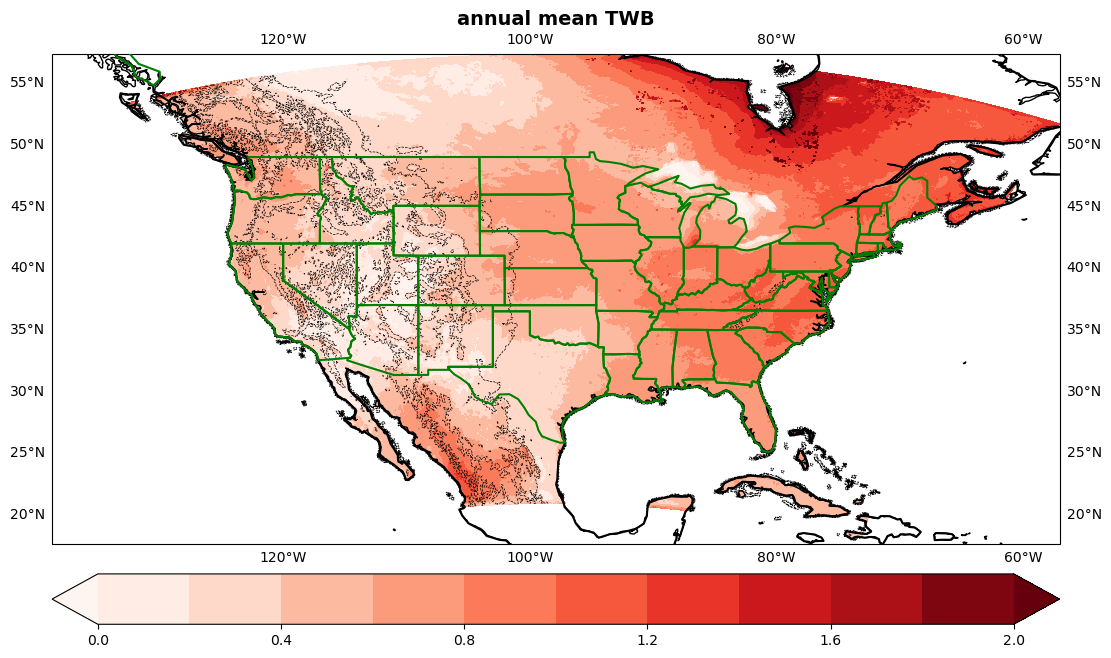

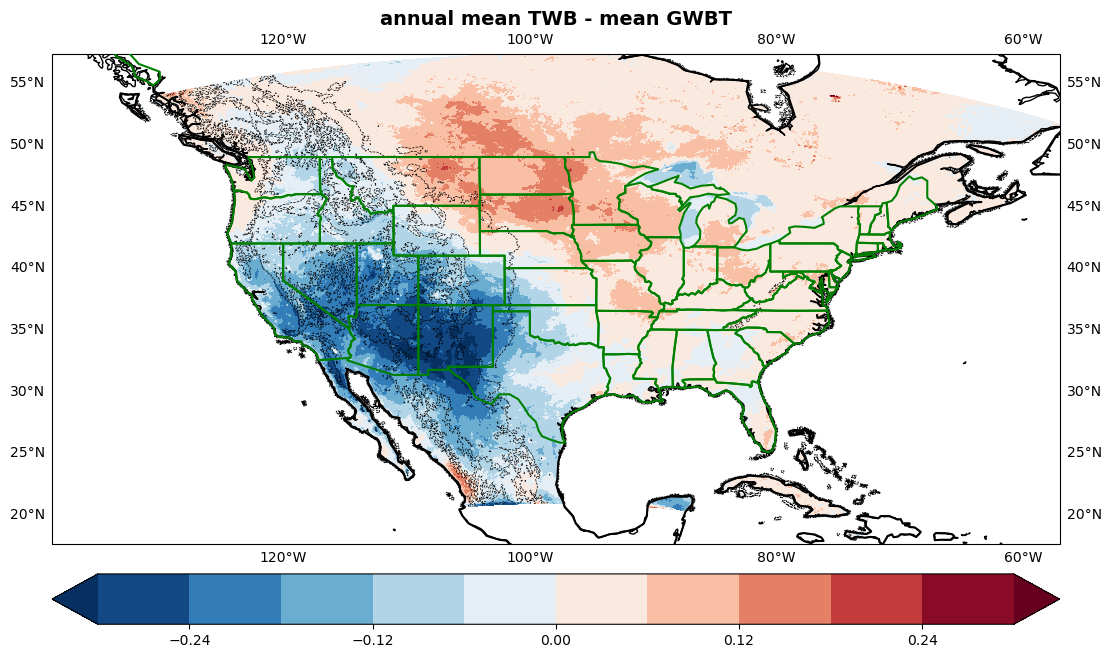

In [9]:
is_mean  = True
for nv in range(n_var):
    if is_mean:
        flnm_i = dir_o + var_s[nv] + '_CONUS404_annual_mean_slope.nc'
    else:
        flnm_i = dir_o + var_s[nv] + '_CONUS404_annual_max_slope.nc'
    print(flnm_i)
    with xr.open_dataset(flnm_i) as ds:
            print(var_s[nv],flnm_i)
            da = ds[var_s[nv]]
             
    #if var_s[nv] == 'GWBT':
    plot_cartopy_2d_overlay (ds.lat, ds.lon, ds[var_s[nv]]*(n_year-1), 'annual mean ' + var_s[nv], 0, 2, 11, 'Reds') 
    if nv == 0:
        data_0 = da
    else: 
        data_2d = da.values - data_0.values
        plot_cartopy_2d_overlay (ds.lat, ds.lon, data_2d*(n_year-1), 'annual mean ' + var_s[nv] + ' - mean ' + var_s[0], -0.3, 0.3, 11, 'RdBu_r') 


- 2.2) Annual maximum increase over 40 year

GWBT /glade/campaign/mmm/c3we/mingge/DOD/GWBT_CONUS404_annual_max_slope.nc


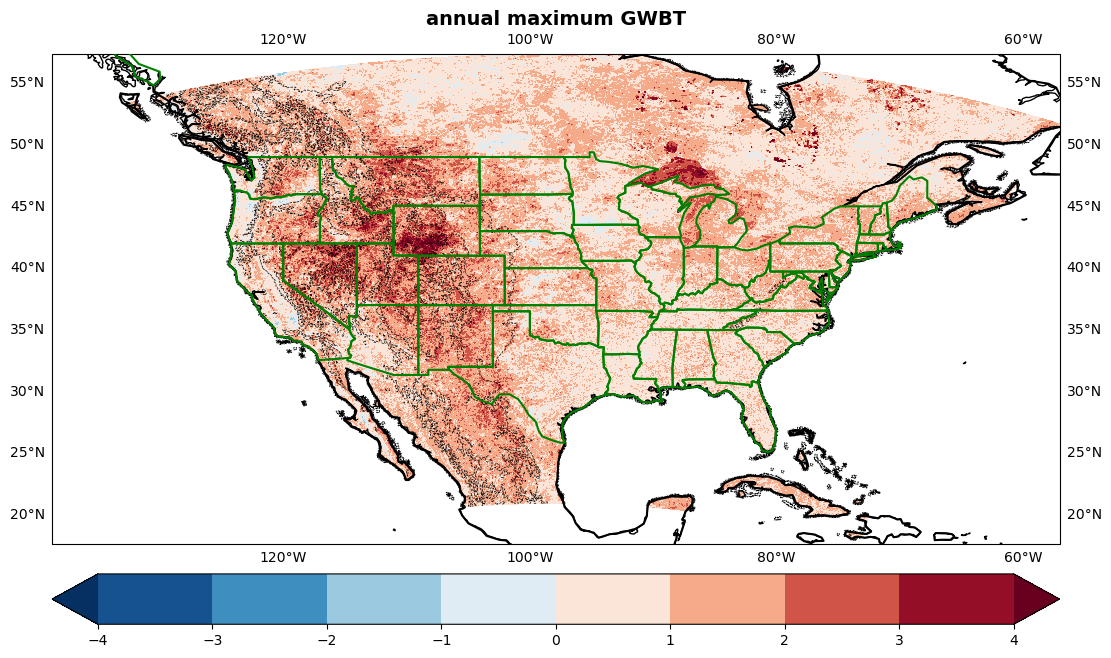

TWB /glade/campaign/mmm/c3we/mingge/DOD/TWB_CONUS404_annual_max_slope.nc


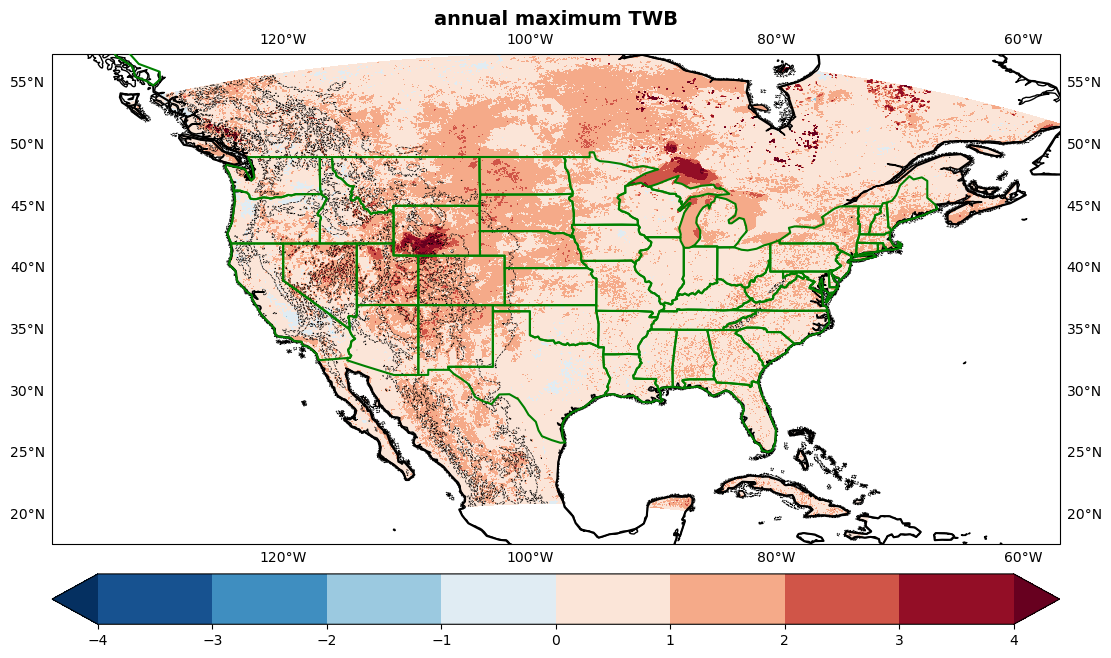

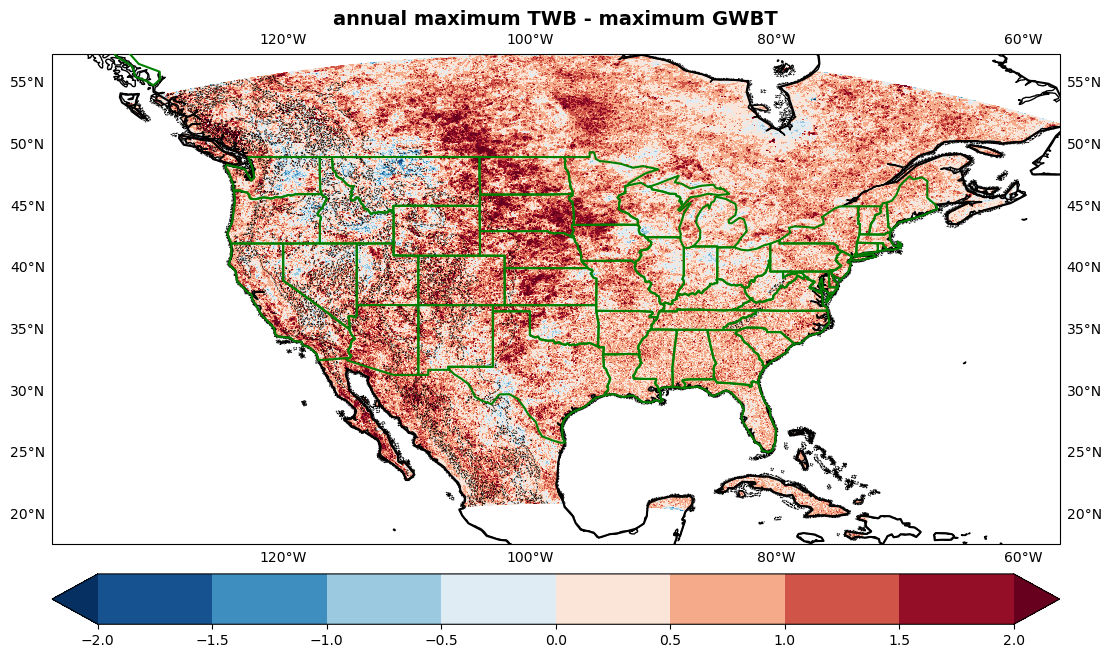

In [10]:
is_mean = False
for nv in range(n_var):
    if is_mean:
        flnm_i = dir_o + var_s[nv] + '_CONUS404_annual_mean_slope.nc'
    else:
        flnm_i = dir_o + var_s[nv] + '_CONUS404_annual_max_slope.nc'
   
        with xr.open_dataset(flnm_i) as ds:
            print(var_s[nv],flnm_i)
            da = ds[var_s[nv]]
             
    plot_cartopy_2d_overlay (ds.lat, ds.lon, ds[var_s[nv]]*(n_year-1), 'annual maximum ' + var_s[nv], -4, 4, 9, 'RdBu_r') 
    if nv == 0:
        data_0 = da
    else: 
        data_2d = da.values - data_0.values
        plot_cartopy_2d_overlay (ds.lat, ds.lon, data_2d*(n_year-1), 'annual maximum ' + var_s[nv] + ' - maximum ' + var_s[0], -2, 2, 9, 'RdBu_r') 



#### 3)  Trend of number of days exceed 95% threshold
- 3.1) Calculate P95 threshold (P95 from 2011-2020 )

In [11]:
mon_e = 12

for nv in range(n_var):
    flnm_o = dir_o + var_s[nv] + '_P95_2011-2020.nc'

    if os.path.exists(flnm_o):
        print(flnm_o, 'exist')
    else:   
        is_new = True
        dir_i = dir_o + var_s[nv] + '_DAILY/'
        for year in range(year_e-9, year_e + 1):
            for month in range(1, mon_e + 1):
                flnm = dir_i + var_s[nv] + '_' + str(year)+ str(month).zfill(2) + '_CONUS404_max.nc'
            
                with xr.open_dataset(flnm) as ds:
                    print(var_s[nv], flnm)
                    data_d = ds[var_s[nv]]
            
                    # concatenate/append numpy data  
                    if is_new == True:
                        data_y = data_d.copy()
                        is_new = False
                    else:
                        data_y = np.append(data_y, data_d, axis=0)
             
        if var_s[nv] == 'GWBT':
            da = xr.DataArray(data = data_y,
                          coords={'lat': ds.lat, 'lon': ds.lon, 'time': range(data_y.shape[0])}, 
                          dims=["time","y", "x"])
        elif  var_s[nv] == 'TWB':
            da = xr.DataArray(data = data_y,
                          coords={'lat': ds.lat, 'lon': ds.lon, 'time': range(data_y.shape[0])}, 
                          dims=["time", "yc", "xc"])
        
        # Calculating percentile for each gridpoint in xarray
        qdata = da.quantile([0.95], dim="time")
        print(qdata.shape)
        
        # create and write out dataset 
        ds = qdata.to_dataset(name = 'p95_' + var_s[nv])         
        ds.to_netcdf(flnm_o)
        print(flnm_o)             

/glade/campaign/mmm/c3we/mingge/DOD/GWBT_P95_2011-2020.nc exist
/glade/campaign/mmm/c3we/mingge/DOD/TWB_P95_2011-2020.nc exist


- 3.2) Calculate annual number of days exceed P95

In [12]:
for nv in range(n_var):
    var_ss = 'p95_' +  var_s[nv]
    flnm_o = dir_o + var_s[nv] + '_CONUS404_annual_dayP95.nc'
    flnm_p95 = dir_o + var_s[nv] + '_P95_2011-2020.nc'

    if os.path.exists(flnm_o):
        print(flnm_o, 'exist')
    else:   
        with xr.open_dataset(flnm_p95) as ds:
            print(var_ss,flnm_p95)
            # use 99% maximum as threshold
            da_threshold = ds[var_ss][0]
            print(da_threshold.shape)
         
            if nv == 0:
                n_i = da_threshold.shape[0]
                n_j = da_threshold.shape[1]
                data_3d = np.zeros((n_year, n_i, n_j))
                #print(da_threshold.shape)
        
        dir_i = dir_o + var_s[nv] + '_DAILY/'
        for year in range(year_s, year_e + 1):
            for month in range(1, mon_e + 1):
                flnm = dir_i + var_s[nv] + '_' + str(year)+ str(month).zfill(2) + '_CONUS404_max.nc'
            
                with xr.open_dataset(flnm) as ds:
                    print(var_s[nv], flnm)
                    data_d = ds[var_s[nv]]
            
                    # concatenate/append numpy data  
                    if month == 1:
                        data_y = data_d.copy()               
                    else:
                        data_y = np.append(data_y, data_d, axis=0)
                
                    if month == mon_e:
                        data_y = data_y - da_threshold.values
                        data_3d[year-year_s] = np.sum(data_y >0,  axis=0)
                        
        if var_s[nv] == 'GWBT':
            da = xr.DataArray(data = data_3d,
                          coords={'time': range(year_s, year_e + 1),'lat': ds.lat, 'lon': ds.lon}, 
                          dims=["time", "y", "x"])
            
        elif  var_s[nv] == 'TWB':
            da = xr.DataArray(data = data_3d,
                          coords={'time': range(year_s, year_e + 1),'lat': ds.lat, 'lon': ds.lon}, 
                          dims=["time", "yc", "xc"])
        
        # create and write out dataset 
        ds = da.to_dataset(name = 'n_' + var_s[nv])         
        ds.to_netcdf(flnm_o)
        print(flnm_o)     
 

/glade/campaign/mmm/c3we/mingge/DOD/GWBT_CONUS404_annual_dayP95.nc exist
/glade/campaign/mmm/c3we/mingge/DOD/TWB_CONUS404_annual_dayP95.nc exist


- 3.3) Calculate trend using xarray da.polyfit

In [13]:
for nv in range(n_var):
    flnm = dir_o + var_s[nv] + '_CONUS404_annual_dayP95.nc'
    flnm_o = dir_o + var_s[nv] + '_CONUS404_annual_dayP95_slope.nc'
    var_ss = 'n_' + var_s[nv]
    
    if os.path.exists(flnm_o):
        print(flnm_o, 'exist')
        with xr.open_dataset(flnm_o) as ds:
            print(var_ss,flnm_o)
            da = ds.polyfit_coefficients
    else:
        with xr.open_dataset(flnm) as ds:
            print(var_ss,flnm)
            data_3d = ds[var_ss]
            trend = data_3d.polyfit(dim='time', deg=1)
            trend.to_netcdf(flnm_o)
            print(flnm_o)   

/glade/campaign/mmm/c3we/mingge/DOD/GWBT_CONUS404_annual_dayP95_slope.nc exist
n_GWBT /glade/campaign/mmm/c3we/mingge/DOD/GWBT_CONUS404_annual_dayP95_slope.nc
/glade/campaign/mmm/c3we/mingge/DOD/TWB_CONUS404_annual_dayP95_slope.nc exist
n_TWB /glade/campaign/mmm/c3we/mingge/DOD/TWB_CONUS404_annual_dayP95_slope.nc


- 3.4) Calculate P-value (<0.05 significant)

In [14]:
for nv in range(n_var):
    flnm_i2 = dir_o + var_s[nv] + '_CONUS404_annual_dayP95_slope.nc'
    flnm_i1 = dir_o + var_s[nv] + '_CONUS404_annual_dayP95.nc'
    
    var_ss = 'n_' + var_s[nv]
    
    with xr.open_dataset(flnm_i1) as ds:
        #print(ds)
        data_1 = ds[var_ss]
    
    data_2 = data_1.copy()
    with xr.open_dataset(flnm_i2) as ds:
        #print(ds)
        coef = ds['polyfit_coefficients']
        for ny in range(n_year):
            data_2[ny] = coef[0]*ny/n_year + coef[1]
    
    corr_1 = xr.corr(data_1, data_2, dim='time')
    #corr_2 = xr.corr(data_2, data_1, dim='time')  
    #co_diff = corr_1  - corr_2

#corr_1.plot()

In [15]:
for nv in range(n_var):
    flnm_o = dir_o + var_s[nv] + '_CONUS404_P95_Pvalue.nc'
    flnm_i1 = dir_o + var_s[nv] + '_CONUS404_annual_dayP95.nc'
    
    var_ss = 'n_' + var_s[nv]
    
    if os.path.exists(flnm_o):
        print(flnm_o, 'exist')
    else:
        with xr.open_dataset(flnm_i1) as ds:
            #print(ds)
            data_3d = ds[var_ss]
    
        pvalue_2d = np.zeros((data_3d.shape[1], data_3d.shape[2]))
        print(pvalue_2d.shape)
        for ni in range(data_3d.shape[1]):
            print(ni)
            for nj in range(data_3d.shape[2]):
                slope, intercept, r, pvalue_2d[ni,nj], se = stats.linregress(ds.time, data_3d[:, ni, nj])
                
        if var_s[nv] == 'GWBT':
            da = xr.DataArray(data = pvalue_2d,
                          coords={'lat': ds.lat, 'lon': ds.lon}, 
                          dims=["y", "x"])
            
        elif  var_s[nv] == 'TWB':
            da = xr.DataArray(data = pvalue_2d,
                          coords={'lat': ds.lat, 'lon': ds.lon}, 
                          dims=[ "yc", "xc"])
        
        # create and write out dataset 
        ds = da.to_dataset(name = var_s[nv])         
        ds.to_netcdf(flnm_o)
        print(flnm_o)  

/glade/campaign/mmm/c3we/mingge/DOD/GWBT_CONUS404_P95_Pvalue.nc exist
/glade/campaign/mmm/c3we/mingge/DOD/TWB_CONUS404_P95_Pvalue.nc exist


- 3.5) Plotting the increase of number of days exceed P95 over 1980-2020 using linear regression ( p -value less than 0.05 hatched)

/glade/campaign/mmm/c3we/mingge/DOD/GWBT_CONUS404_annual_dayP95_slope.nc
/glade/campaign/mmm/c3we/mingge/DOD/GWBT_CONUS404_annual_dayP95_slope.nc


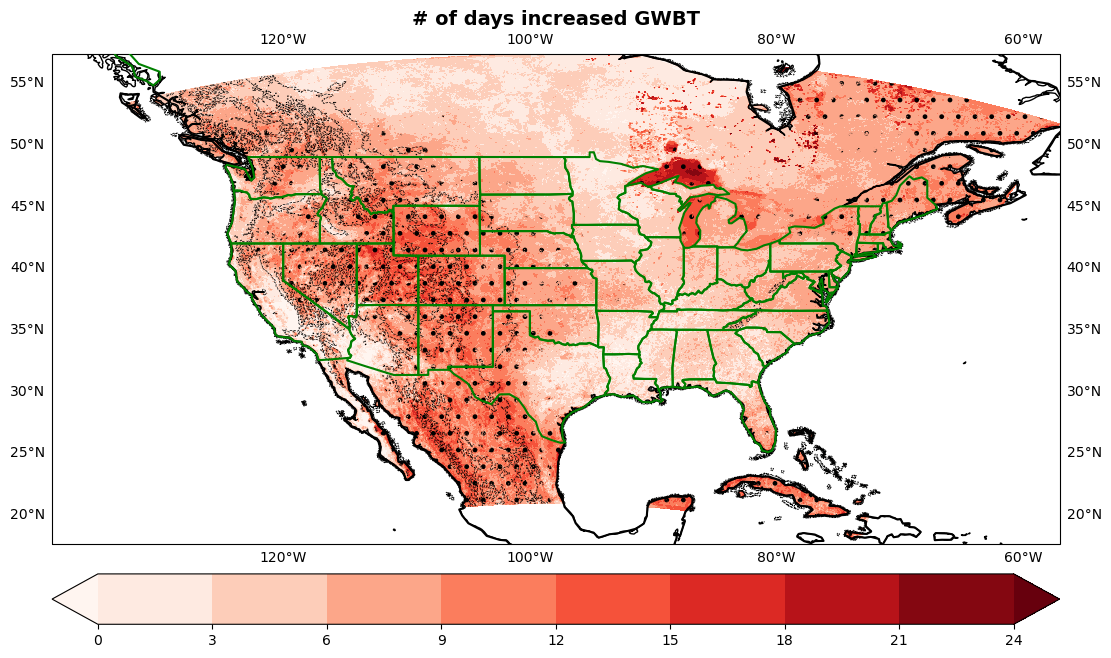

/glade/campaign/mmm/c3we/mingge/DOD/TWB_CONUS404_annual_dayP95_slope.nc
/glade/campaign/mmm/c3we/mingge/DOD/TWB_CONUS404_annual_dayP95_slope.nc


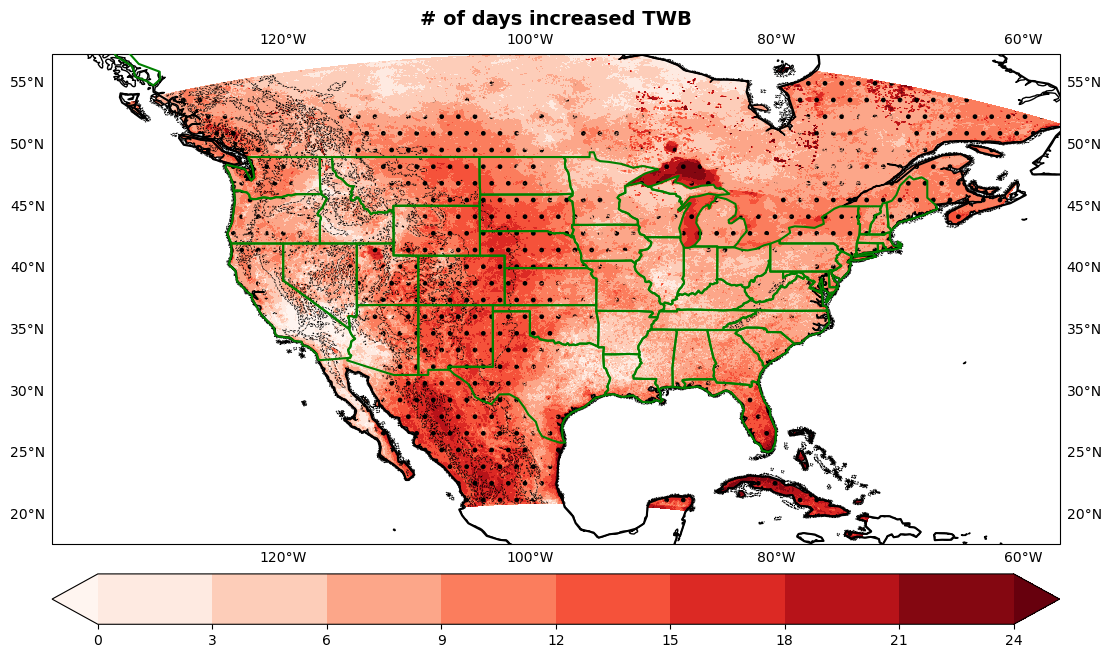

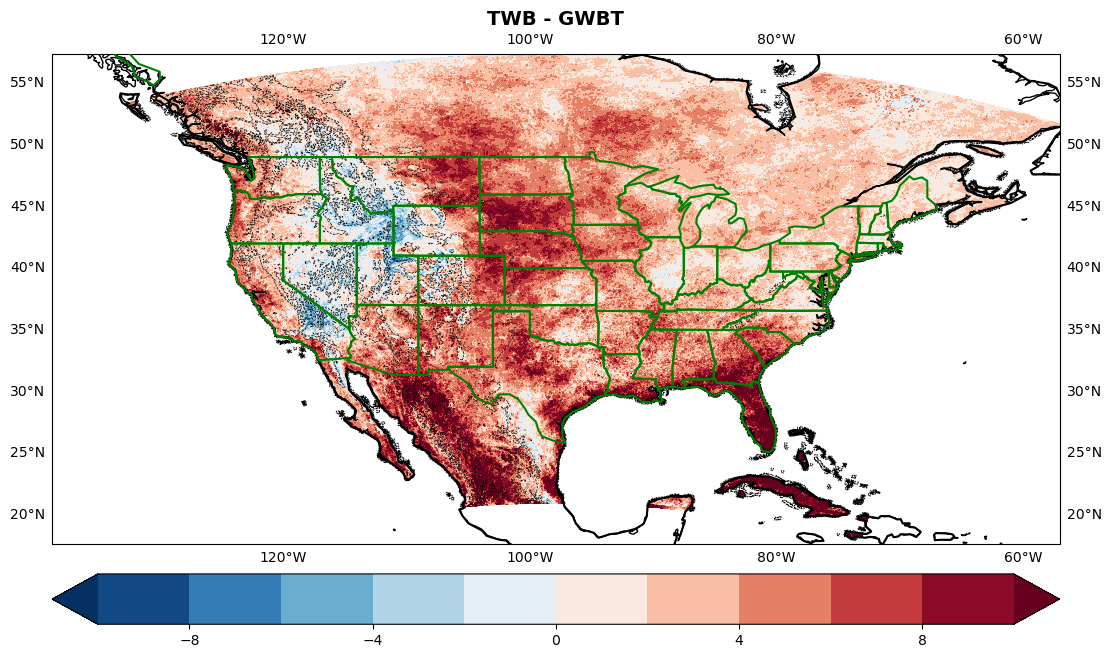

In [16]:
# A p -value less than 0.05 (typically ≤ 0.05) 
for nv in range(n_var):
    flnm = dir_o + var_s[nv] + '_CONUS404_annual_dayP95_slope.nc'
    print(flnm)
    var_ss = 'n_' + var_s[nv]
    
    # read p_value which is used for hatching (0.05)
    flnm_i = dir_o +  var_s[nv] + '_CONUS404_P95_Pvalue.nc'
    with xr.open_dataset(flnm_i) as dss:
        data_p = dss[var_s[nv]]
         
    with xr.open_dataset(flnm) as ds:
        print(flnm)
        da = ds['polyfit_coefficients'] [0]
    
    if var_s[nv] == 'GWBT':
        plot_cartopy_hatches (dss.lat, dss.lon, da*(n_year-1), data_p, '# of days increased '+ var_s[nv], 0, 24, 9, 'Reds')
    else:
        plot_cartopy_hatches (dss.lat, dss.lon, da*(n_year-1), data_p,'# of days increased '+ var_s[nv], 0, 24, 9, 'Reds')
        
    if nv == 0:
        data_0 =  da
    else:
        data_2d = da.values  - data_0.values 
        plot_cartopy_2d_overlay (dss.lat, dss.lon, data_2d*(n_year-1),  var_s[nv] + ' - ' + var_s[0], -10, 10, 11, 'RdBu_r') 
